# fisrt level analysis 
first level is for one subject but we can have different sesseion 
as we did in spm this notebook including increasing the contrast , GLM model , beta map , z score , ... 

what we should serach on : 
    note : what we should seah on drift mode , HRF model ,
    note 2 : look at document of nilearn !!!
    look at GLM and different regressor models and why we use them 

the task : 
Get the z_map of each contrast for Sub-02(run01 - run09):

Famous >> Scrambled

Unfamiliar >> Scrambled

Face >> Scrambled

Famous >> Unfamiliar
note : use loop 
note : better use the CONN for preprocessing 

### Note of the 2nd session 

z map concluded for one subject using different runs of the subject. 
**we need loop**
 becuse we we have to reads all the data for each subjects, read for each subject 

## CODE 

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 
import nibabel as nib
from nilearn import plotting 
from nilearn.image import mean_img, index_img
from nilearn.glm import first_level, threshold_stats_img

In [35]:
run1 = nib.load(r'D:\research\mentoring\python_fMRI\first_week\sub_2\Func\Run_1\sub-02_ses-mri_task-facerecognition_run-01_bold.nii')
run2 = nib.load(r'D:\research\mentoring\python_fMRI\first_week\sub_2\Func\Run_2\sub-02_ses-mri_task-facerecognition_run-02_bold.nii')
run3 = nib.load(r'D:\research\mentoring\python_fMRI\data\sub_2\func\sub-02_ses-mri_task-facerecognition_run-03_bold.nii')
run4 = nib.load(r'D:\research\mentoring\python_fMRI\data\sub_2\func\sub-02_ses-mri_task-facerecognition_run-04_bold.nii')
run5 = nib.load(r'D:\research\mentoring\python_fMRI\data\sub_2\func\sub-02_ses-mri_task-facerecognition_run-05_bold.nii')
run6 = nib.load(r'D:\research\mentoring\python_fMRI\data\sub_2\func\sub-02_ses-mri_task-facerecognition_run-06_bold.nii')
run7 = nib.load(r'D:\research\mentoring\python_fMRI\data\sub_2\func\sub-02_ses-mri_task-facerecognition_run-07_bold.nii')
run8 = nib.load(r'D:\research\mentoring\python_fMRI\data\sub_2\func\sub-02_ses-mri_task-facerecognition_run-08_bold.nii')
run9 = nib.load(r'D:\research\mentoring\python_fMRI\data\sub_2\func\sub-02_ses-mri_task-facerecognition_run-09_bold.nii')


event1= pd.read_table(r'D:\research\mentoring\python_fMRI\first_week\sub_2\Func\Run_1\sub-02_ses-mri_task-facerecognition_run-01_events.tsv')
event2= pd.read_table(r'D:\research\mentoring\python_fMRI\first_week\sub_2\Func\Run_2\sub-02_ses-mri_task-facerecognition_run-02_events.tsv')
event3= pd.read_table(r'D:\research\mentoring\python_fMRI\data\sub_2\func\sub-02_ses-mri_task-facerecognition_run-03_events.tsv')
event4= pd.read_table(r'D:\research\mentoring\python_fMRI\data\sub_2\func\sub-02_ses-mri_task-facerecognition_run-04_events.tsv')
event5= pd.read_table(r'D:\research\mentoring\python_fMRI\data\sub_2\func\sub-02_ses-mri_task-facerecognition_run-05_events.tsv')
event6= pd.read_table(r'D:\research\mentoring\python_fMRI\data\sub_2\func\sub-02_ses-mri_task-facerecognition_run-06_events.tsv')
event7= pd.read_table(r'D:\research\mentoring\python_fMRI\data\sub_2\func\sub-02_ses-mri_task-facerecognition_run-07_events.tsv')
event8= pd.read_table(r'D:\research\mentoring\python_fMRI\data\sub_2\func\sub-02_ses-mri_task-facerecognition_run-08_events.tsv')
event9= pd.read_table(r'D:\research\mentoring\python_fMRI\data\sub_2\func\sub-02_ses-mri_task-facerecognition_run-09_events.tsv')

In [36]:
tr = 2 
n_volumes =run1.shape[3] 
frame_times = np.arange(n_volumes)*tr

In [37]:
frame_times

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258,
       260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284,
       286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310,
       312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336,
       338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 36

In [40]:
event1

,onset,duration,circle_duration,stim_type,trigger,button_pushed,response_time,stim_file
0,0.000,0.851,0.585,UNFAMILIAR,13,7,1.314,func/u015.bmp
1,3.056,0.812,0.447,UNFAMILIAR,14,7,0.978,func/u015.bmp
2,6.364,0.915,0.580,UNFAMILIAR,13,7,0.870,func/u012.bmp
3,9.604,0.940,0.514,UNFAMILIAR,13,4,0.754,func/u007.bmp
4,12.828,0.985,0.515,UNFAMILIAR,13,7,0.753,func/u013.bmp
...,...,...,...,...,...,...,...,...
94,382.753,0.894,0.519,SCRAMBLED,17,7,0.846,func/s013.bmp
95,385.943,0.850,0.528,SCRAMBLED,17,4,0.987,func/s003.bmp
96,388.951,0.830,0.401,SCRAMBLED,18,4,0.603,func/s003.bmp
97,392.057,0.993,0.506,SCRAMBLED,19,7,1.091,func/s006.bmp


In [41]:
event1.rename (columns = {'stim_type' : 'trial_type'}, inplace= True)
event2.rename (columns = {'stim_type' : 'trial_type'}, inplace= True)
event3.rename (columns = {'stim_type' : 'trial_type'}, inplace= True)
event4.rename (columns = {'stim_type' : 'trial_type'}, inplace= True)
event5.rename (columns = {'stim_type' : 'trial_type'}, inplace= True)
event6.rename (columns = {'stim_type' : 'trial_type'}, inplace= True)
event7.rename (columns = {'stim_type' : 'trial_type'}, inplace= True)
event8.rename (columns = {'stim_type' : 'trial_type'}, inplace= True)
event9.rename (columns = {'stim_type' : 'trial_type'}, inplace= True)


In [42]:
event1= event1.dropna()
event2= event2.dropna()
event3= event3.dropna()
event4= event4.dropna()
even5= event5.dropna()
event6= event6.dropna()
event7= event7.dropna()
event8= event8.dropna()
event9= event9.dropna()

C:\Users\Dorsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nilearn\glm\first_level\experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: button_pushed, trigger, response_time, circle_duration, stim_file
  warnings.warn(
C:\Users\Dorsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nilearn\glm\first_level\experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: button_pushed, trigger, response_time, circle_duration, stim_file
  warnings.warn(


AttributeError: module 'matplotlib' has no attribute 'show'

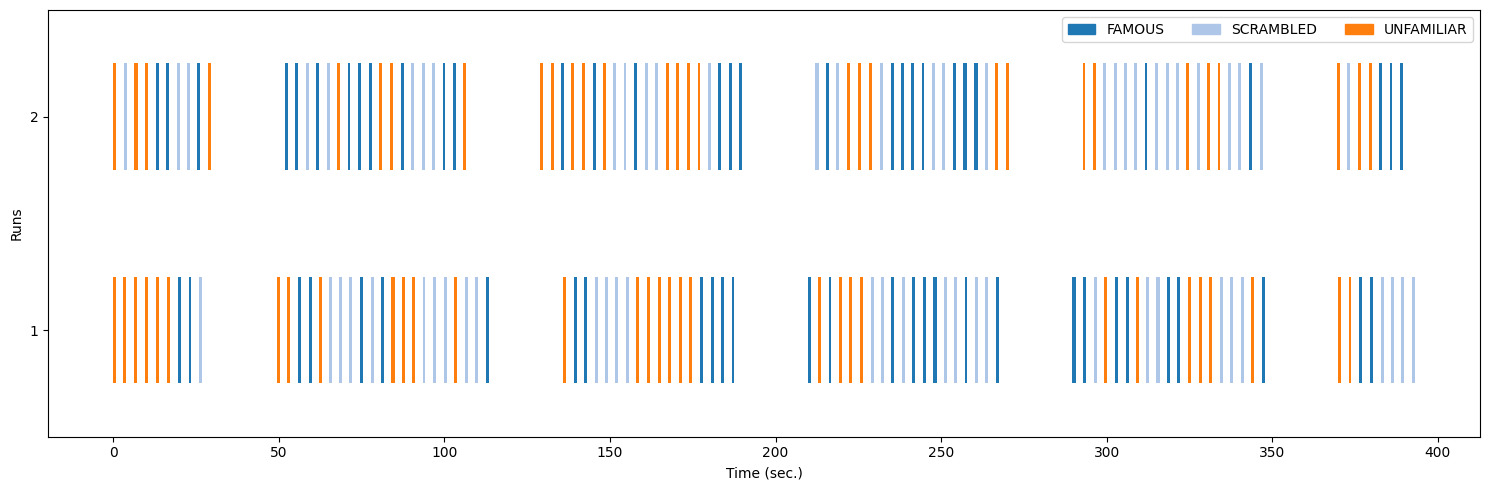

In [43]:
plotting.plot_event([event1, event2], figsize = (15,5))
plt.show()
'''
 what is the erro ?
''' 

In [56]:
# drift model type of denoising(physilogical , heart rate , resprition , motion ), high_pass what is the maximum , note : the highpass and drift model and hrf is not neccery to tell it becuse it has by drfualt values 
 # drift model type the define is cosin , the None dont do anything becuse we have already denoised it  
 # hrf = convolving the brain work to what we detect the , number is 
 # we have different type of hrf , like none , 
 # dont use them in spm 
design_matrix_run1 = first_level.make_first_level_design_matrix(frame_times, event1, drift_model = 'cosine' ,high_pass = 0.01 ,hrf_model = 'spm' )
design_matrix_run2 = first_level.make_first_level_design_matrix(frame_times, event2, drift_model = 'cosine' ,high_pass = 0.01 ,hrf_model = 'spm' )
design_matrix_run3 = first_level.make_first_level_design_matrix(frame_times, event3, drift_model = 'cosine' ,high_pass = 0.01 ,hrf_model = 'spm' )
design_matrix_run4 = first_level.make_first_level_design_matrix(frame_times, event4, drift_model = 'cosine' ,high_pass = 0.01 ,hrf_model = 'spm' )
design_matrix_run5 = first_level.make_first_level_design_matrix(frame_times, event5, drift_model = 'cosine' ,high_pass = 0.01 ,hrf_model = 'spm' )
design_matrix_run6 = first_level.make_first_level_design_matrix(frame_times, event6, drift_model = 'cosine' ,high_pass = 0.01 ,hrf_model = 'spm' )
design_matrix_run7 = first_level.make_first_level_design_matrix(frame_times, event7, drift_model = 'cosine' ,high_pass = 0.01 ,hrf_model = 'spm' )
design_matrix_run8 = first_level.make_first_level_design_matrix(frame_times, event8, drift_model = 'cosine' ,high_pass = 0.01 ,hrf_model = 'spm' )
design_matrix_run9 = first_level.make_first_level_design_matrix(frame_times, event9, drift_model = 'cosine' ,high_pass = 0.01 ,hrf_model = 'spm' )



C:\Users\Dorsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nilearn\glm\first_level\experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: button_pushed, trigger, response_time, circle_duration, stim_file
  warnings.warn(
C:\Users\Dorsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nilearn\glm\first_level\experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: button_pushed, trigger, response_time, circle_duration, stim_file
  warnings.warn(
C:\Users\Dorsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nilearn\glm\first_level\experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: button_pushed, trigge

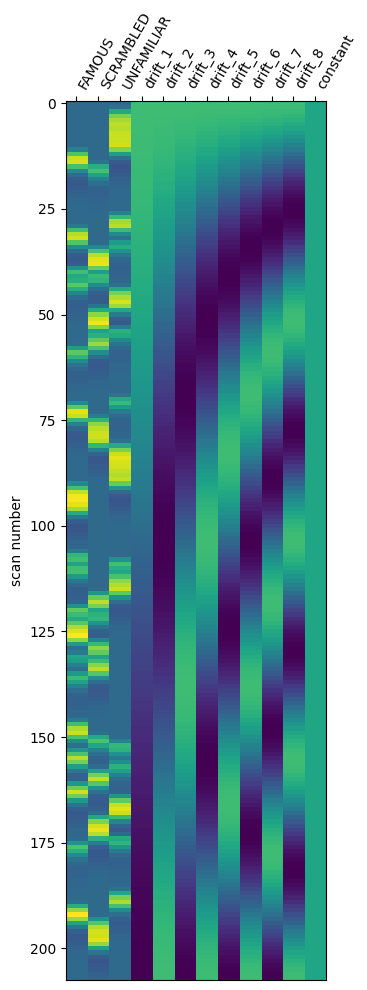

In [48]:
plotting.plot_design_matrix(design_matrix_run1) # we work with 3 first 
plotting.show()

In [58]:
fmri_img =[run1, run2, run3, run4, run5, run6, run7, run8, run9]
design_metrics = [design_matrix_run1, design_matrix_run2, design_matrix_run3, design_matrix_run4, design_matrix_run5, design_matrix_run6, design_matrix_run7, design_matrix_run8,design_matrix_run9 ] 

In [59]:
mean_image = mean_img(fmri_img)

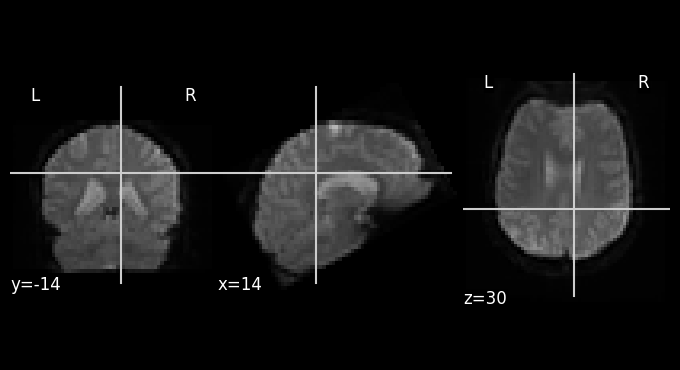

In [60]:
plotting.plot_anat(mean_image)

In [63]:
fmri_glm = first_level.FirstLevelModel()
fit_glm = fmri_glm.fit(fmri_img , design_matrices= design_metrics) 

C:\Users\Dorsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nilearn\maskers\nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
C:\Users\Dorsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\memory.py:312: UserWarning: Casting data from int16 to float32
  return self.func(*args, **kwargs)
C:\Users\Dorsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nilearn\maskers\nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_

In [62]:
design_matrix_run1

,FAMOUS,SCRAMBLED,UNFAMILIAR,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,drift_7,drift_8,constant
0,0.000000,0.000000,0.000000,0.098055,0.098047,0.098033,0.098013,0.097988,0.097957,0.097921,0.097879,1.0
2,0.000000,0.000000,0.017962,0.098033,0.097957,0.097832,0.097656,0.097430,0.097153,0.096828,0.096452,1.0
4,0.000000,0.000000,0.141787,0.097988,0.097779,0.097430,0.096942,0.096316,0.095552,0.094653,0.093618,1.0
6,0.000000,0.000000,0.244265,0.097921,0.097511,0.096828,0.095874,0.094653,0.093167,0.091421,0.089419,1.0
8,0.000000,0.000000,0.282872,0.097832,0.097153,0.096027,0.094456,0.092450,0.090017,0.087168,0.083916,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
406,-0.001582,-0.041020,0.000000,-0.097832,0.097153,-0.096027,0.094456,-0.092450,0.090017,-0.087168,0.083916,1.0
408,-0.000637,-0.037794,0.000000,-0.097921,0.097511,-0.096828,0.095874,-0.094653,0.093167,-0.091421,0.089419,1.0
410,-0.000204,-0.027816,0.000000,-0.097988,0.097779,-0.097430,0.096942,-0.096316,0.095552,-0.094653,0.093618,1.0
412,-0.000037,-0.017444,0.000000,-0.098033,0.097957,-0.097832,0.097656,-0.097430,0.097153,-0.096828,0.096452,1.0


In [65]:
contrast = np.eye(design_matrix_run1.shape[1])
contrast

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [70]:
base_contrast = {}
for i, column in enumerate (design_matrix_run1.columns):
    print(i, column)
    base_contrast[column] = contrast[i]
print(base_contrast)

0 FAMOUS
1 SCRAMBLED
2 UNFAMILIAR
3 drift_1
4 drift_2
5 drift_3
6 drift_4
7 drift_5
8 drift_6
9 drift_7
10 drift_8
11 constant
{'FAMOUS': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'SCRAMBLED': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'UNFAMILIAR': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'drift_1': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), 'drift_2': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), 'drift_3': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), 'drift_4': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), 'drift_5': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), 'drift_6': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), 'drift_7': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), 'drift_8': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), 'constant': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}


In [73]:
'''famous >>> screamble'''
famous_scrambled = base_contrast['FAMOUS']-base_contrast['SCRAMBLED']
print(famous_scrambled)

'''Famous >> Unfamiliar'''

[ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


'Famous >> Unfamiliar'

In [ ]:
'''Face >> Scrambled'''
famous_scrambled = (base_contrast['FAMOUS'] + base_contrast['UNFAMILIAR']) / 2 - base_contrast['SCRAMBLED']

In [77]:
'''Famous >> Unfamiliar'''
famous_unfamiliar = base_contrast['FAMOUS'] -base_contrast['SCRAMBLED']


<Axes: label='conditions'>

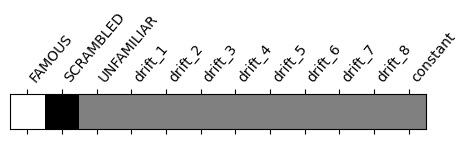

In [74]:
plotting.plot_contrast_matrix(famous_scrambled, design_matrix_run1)

In [ ]:
z_map = fit_glm.compute_contrast([famous_scrambled, famous_scrambled], output_type = 'z_score')


In [ ]:
plotting.plot_stat_map(z_map, bg_img = mean_image, threshold = 2.3, display_mode = 'z', cut_coords = 3, title = 'Face > Scrambled')
